# CCI Forecaster

#### The Consumer confidence index (CCI)

- The consumer confidence index provides an indication of developments in households.

- This report is released monthly



- The CCI data is gathered qualitatively and consumer consumption and savings are key factors for developing the CCI. Spending power and financial health of consumers are accounted for as well as unemployment and capability of saving. 

- The survey also includes consumers sentiments based on current economic condition and their expectations


- Many Economist believe that the CCI is a lagging indicator and mainly use it to confirm trends in the general economy. Since consumers accounts for a big portion of the Global GDP it is an important indicator for where the economy may be heading.



- Manufacturers, retailers, banks and the government can use the CCI to influence their decisions. For example, if the index rises by 10% then manufacturers may increase production to meet the anticipated consumer demand.



#### What are we looking at?


- What we are looking at is an aggregate of economic information from 37 countries.

- The OECD CCI is made of 170 reports and it covers many short term indicators within it; each country contributes 5-10 reports monthly.

Some of the CCI survey questions include:
- Current business condition
- Business condition for next 6 months
- Current Employment condition
- Employment condition for the next 6 months
- Total family income for next 6 months ..etc 



It is important to note that ~40% of the CCI comprises consumer opinions on curent economic condition and ~60% on consumer expectation of fuuture economic conditions. 



#### How does the indicator work?

- When the CCI is above 100 it indicates a boost in consumer confidence towards the future economy, hence they are more likely to spend more and save less (consumers tend to do major purchases within 12 months). 
- When CCI is below 100 consumers are more pessimistic towards future developments in the economy, as a result will they will save more and consume less.

#### How can I use it?

-  if you are a trend-follower, when the CCI is rising or at least above 100 and the markets are trending up you can assume bullishness and vice versa. When they don't agree or worse when they really don't agree, one should be very concerned - as it's hard to know which side is right, it may be best to minimize risk and wait things out.

In [ ]:
How the market responds to the 

***Look at the Composite Leading indicator notebook for more detailed breakdown of the code***

In [1]:
import matplotlib 
import matplotlib.pyplot as plt 
import pandas_datareader as dt
import io, base64, os, json, re , math
import pandas as pd 
import numpy as np
import datetime
import warnings
import calendar
import statsmodels.api as sm
import datetime
from dateutil import relativedelta

%matplotlib inline
warnings.filterwarnings('ignore')

In [7]:
#load the cli data
cci_raw=pd.read_csv('https://stats.oecd.org/sdmx-json/data/DP_LIVE/OECD.CCI.../OECD?contentType=csv&detail=code&separator=comma&csv-lang=en')
cci_df=cci_raw[cci_raw['LOCATION'] =='OECD']
    
full_date_list=[]
for tm in cci_df['TIME']:
    year=int(tm.split('-')[0])
    month=int(tm.split('-')[1])
    #print calendar full date
    full_date_list.append(tm + '-'+str(calendar.monthrange(year,month)[1]))
        
cci_df['Date'] = full_date_list
cci_df['Date']= pd.to_datetime(cci_df['Date'])
cci_df=cci_df[['Date','Value']]
cci_df.index=cci_df['Date']

In [8]:
#We will be using only the Adj close prices
all_spx_data= dt.DataReader('^GSPC', 'yahoo', start='01-01-1970')

#all_spx_data['Date'] = pd.to_datetime(all_spx_data['Date'])

spx_data=all_spx_data[['Adj Close']]

#sort data from oldest to newest
spx_data=spx_data.sort_values('Date', ascending=True)


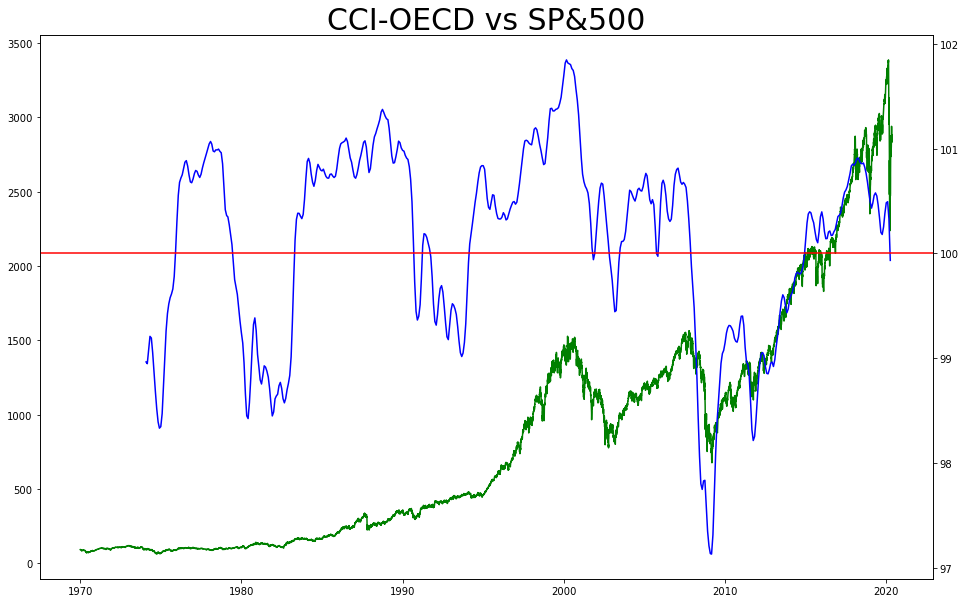

In [9]:

fig, ax = plt.subplots(figsize=(16, 10))

plt.plot(spx_data, label='SP500', 
         color='green')


second_axis= ax.twinx()

plt.plot(cci_df['Date'], cci_df['Value'], label='CCI', 
         color='blue')

plt.title('CCI-OECD vs SP&500', fontsize=30)

second_axis.axhline(y=100, color='red')


In [10]:
#Global Variable
exp_smooth_fit=None
cci_df=None

# load and prepare the data
def Startup():
    #The variables we will need after function runs
    global exp_smooth_fit, cci_df
    
    #load the cli data
    cci_raw=pd.read_csv('https://stats.oecd.org/sdmx-json/data/DP_LIVE/OECD.CCI.../OECD?contentType=csv&detail=code&separator=comma&csv-lang=en')
    cci_df=cci_raw[cci_raw['LOCATION'] =='OECD']
    
    full_date_list=[]
    for tm in cci_df['TIME']:
        year=int(tm.split('-')[0])
        month=int(tm.split('-')[1])
        #print calendar full date
        full_date_list.append(tm + '-'+str(calendar.monthrange(year,month)[1]))
        
    cci_df['Date'] = full_date_list
    cci_df['Date']= pd.to_datetime(cci_df['Date'])
    cci_df=cci_df[['Date','Value']]
    cci_df.index=cci_df['Date']
    
    
    
    
    #train the model on all existing data
    exp_smooth_fit=sm.tsa.ExponentialSmoothing(cci_df['Value'], seasonal_periods=43,
                                              trend='add', seasonal='add', damped=True).fit()
    
    
def GetForecast(months_out):
    
    new_dates=[]
    for month_ in range(1,months_out+1):
        nextmonth=pd.to_datetime(str(cci_df['Date'].values[-1]))+relativedelta.relativedelta(month=month_)
        new_dates.append(nextmonth)
    

   
    
    new_data= exp_smooth_fit.forecast(months_out)
    future_df=pd.DataFrame({'Date':new_dates,'Value':new_data})
    future_df.index=future_df['Date']
    
    print(cci_df['Date'][-1])
    print(future_df['Date'][0])
    
    fig,ax = plt.subplots(figsize=(16,10))
    plt.plot(future_df['Value'], label='Holt Winter Forcast', linewidth=5)
    plt.plot(cci_df['Value'], label='Train')

    ax.axhline(y=100,color='gray')
    plt.legend(loc='best')
    plt.title('CCI Forecast Util '+ str(future_df['Date'].values[-1])[0:10])
    plt.show()
    

2020-03-31 00:00:00
2020-01-31 00:00:00


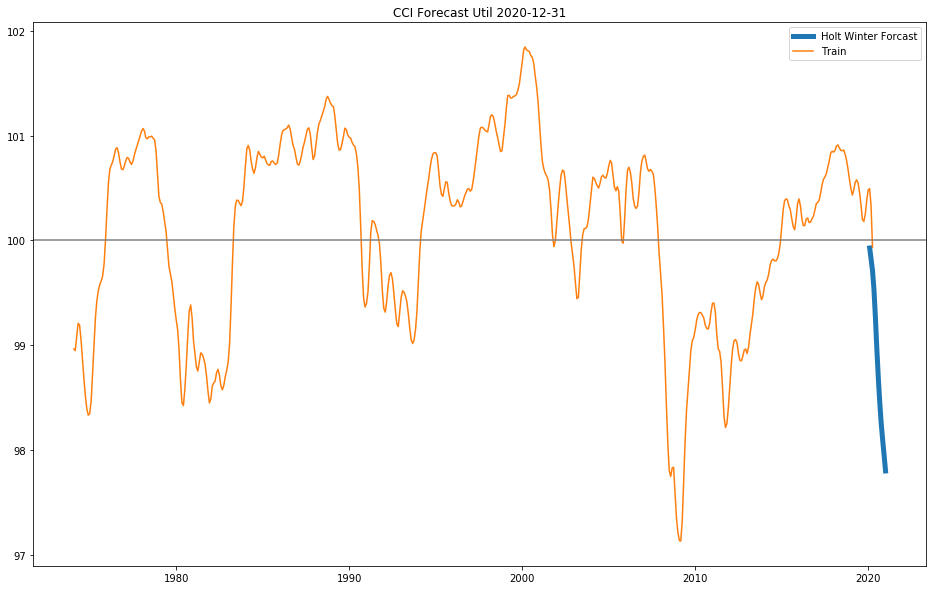

In [11]:
Startup()
GetForecast(12)